# Data analysis

## convert location to force action point

write your own path:

In [2]:
# importing module
from pandas import *
import csv
import numpy as np
# reading CSV file
dataInput = read_csv("D:\materials of JI\\4903robotic arm\\ansys working\\ansys scripting\\filenode cylin.csv")
dataOutput = "D:\materials of JI\\4903robotic arm\\ansys working\\ansys scripting\\output 1121 data.csv"

In [1]:

# converting column data to list
NodeNum = dataInput['Node Number'].tolist()
LOC_X = dataInput['X Location (mm)'].tolist()
LOC_Y= dataInput['Y Location (mm)'].tolist()
LOC_Z = dataInput['Z Location (mm)'].tolist()
# width a, height b
input_displacement=[]
a = 15
b = 5
x_0 = 19.491
y_MAX = 30
z_MAX = 10
radius = 0.5
angle_Max=30
Nb = 10
Na = 10
bb = b / Nb
aa = a / Na
Nsel = []
def FindID_Byloc(x,y,z,r,N):
    '''Given a location find an id'''
    N.clear()
    string = ':' + str(x) + ', ' + str(y) +', ' +  str(z) + ', ' + str(radius)
    N.append(string)
    for node in NodeNum:
        index = NodeNum.index(node)
        xloc = LOC_X[index]
        yloc = LOC_Y[index]
        zloc = LOC_Z[index]
        Distance = ((xloc - x) ** 2 + (yloc - y) ** 2 + (zloc - z) ** 2) ** 0.5
        if Distance < r:
            N.append(str(node))
            break
def Write_data(filename, Ng):
    with open(filename, 'a') as file:
        spamwriter = csv.writer(file, lineterminator='\n')
        char = []
        for n in Ng:
            rowid = []
            rowid.append(n)
            spamwriter.writerow(rowid)
def judgement(x,y,dx,dy,da):
    x_cen_trans = x  *np.cos(da) - y  *np.sin(da) + dx
    y_cen_trans = x  *np.sin(da) + y  *np.cos(da) + dy
    if (x_cen_trans  > -b and x_cen_trans  < b) and (y_cen_trans >-a and y_cen_trans < a):
        return 0
    return 1
def convert(delta, y_bar, x_bar):
    '''convert position delta to force acting point'''
    for dx in np.arange(-z_MAX, z_MAX, 1):
        for dy in np.arange(-y_MAX, y_MAX, 1):
            for da in np.arange(-angle_Max,angle_Max+5,5):
                delta.append([dx, dy, da])
                #ccw as positive for da
                square = []
                A = 0
                A_times_x = 0
                A_times_y = 0
                for i in np.arange(0, 2 * b , 2*bb):
                    for j in np.arange(0, 2* a , 2*aa):
                        square.append([i, j])
                        if judgement(i + bb - b, j + aa - a, dx,dy,da/180*np.pi):
                                # All four points of the square are outside the hole
                                A +=  4 * aa * bb
                                A_times_x += 4 * aa * bb * (i + bb)
                                A_times_y += 4 * aa * bb * (j + aa)
                if A!=0:
                    x_cm = A_times_x / A
                    y_cm = A_times_y / A
                    x_bar.append(x_cm)
                    y_bar.append(y_cm)
                else:
                    x_bar.append(-1)
                    y_bar.append(-1)
with open(dataOutput, 'w') as f:
    f.truncate()
Nsel_list = []
Fxpos =[]
Fypos = []
delta = []
convert(delta, Fypos, Fxpos)
for i in range(0, len(delta)):
        FindID_Byloc(x_0, Fypos[i], Fxpos[i], radius,Nsel)
        #print(Nsel)
        Nsel_list.append(Nsel)
        Write_data(dataOutput, Nsel)
print(len(Nsel_list))



NameError: name 'dataInput' is not defined

In [ ]:
print(Nsel_list)

## Import data

write your own path:

In [4]:
from pandas import *
import csv
import math
# reading CSV file
dataInput = read_csv("D:\materials of JI\\4903robotic arm\\ansys working\\ansys scripting\\Pythontest\\dataOutput_disp0.1mm11_22.csv")
dataOutput = "D:\materials of JI\\4903robotic arm\\ansys working\\ansys scripting\\output.csv"

This code provide the extracted data of Matrix of $Fx,Fy,Fz$, which indicate the magnitude of force in the directions.
For example the matrix of Fz will be: $$\begin{bmatrix}F^{(1)}_{z_{R12}} & F^{(2)}_{z_{R12}}&...\\F^{(1)}_{z_{R21}} & F^{(2)}_{z_{R21}}&...\\\vdots&&\\F^{(1)}_{z_{L23}} & F^{(2)}_{z_{L23}}&...\end{bmatrix}$$
therefore, $$FzMatrix[0][0] = F^{(1)}_{z_{R12}}$$ 
$$FxMatrix[1][7] = F^{(2)}_{x_{L23}}$$
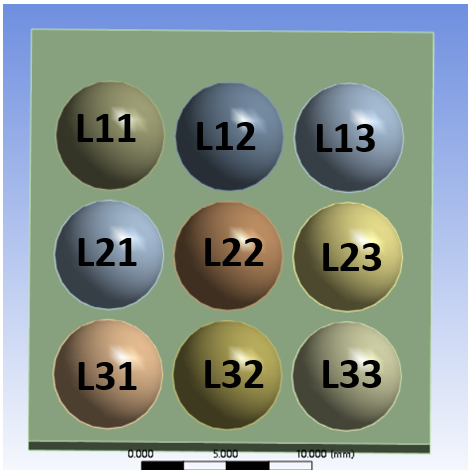

In [5]:

# converting column data to list
Loc = dataInput['Loc'].tolist()
FX = dataInput['Fx'].tolist()
FY= dataInput['Fy'].tolist()
FZ = dataInput['Fz'].tolist()
#print(FZ)
FzMatrix = []
FxMatrix = []
FyMatrix = []
LocMatrix = []
for i in FZ:
    if math.isnan(i):
        FzMatrix.append([])
    else: FzMatrix[-1].append(i)
for i in FX:
    if math.isnan(i):
        FxMatrix.append([])
    else: FxMatrix[-1].append(i)
for i in FY:
    if math.isnan(i):
        FyMatrix.append([])
    else: FyMatrix[-1].append(i)
#print (FxMatrix)
#print(Loc)

## Extract coordinate

In [6]:
Location = []
for i in Loc:
    if i != '1':
        LocMatrix.append(i)
print(LocMatrix)
for i in LocMatrix:
    Location.append([])
    while i.count(',') != 0:
        commapos = i.find(',')
        Location[-1].append(float(i[0:commapos]))
        i = i[commapos+2:-1]
print (Location)
YCoordinate = []
ZCoordinate = []
for i in Location:
    YCoordinate.append(i[1])
for i in Location:
    ZCoordinate.append(i[2])
print('ZCoordinate is ')
print (ZCoordinate)
print (len(ZCoordinate))
Fz_L12 = []
for i in FzMatrix:
    Fz_L12.append(i[0])
print (Fz_L12)
print (len(Fz_L12))

['19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15.0, 5.0, 0.5', '19.491, 15

## plot

### plot of (y,Fz_L12)

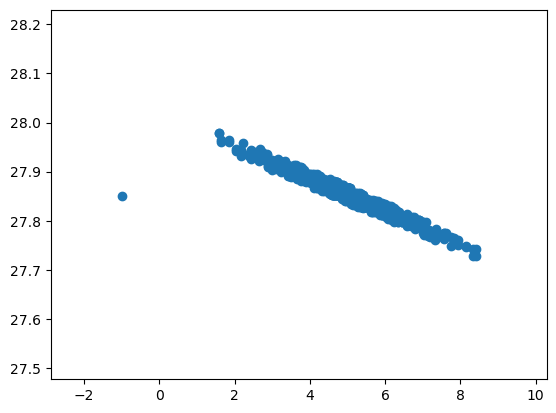

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.scatter(ZCoordinate,Fz_L12)
ax.margins(0.2, 1)

### plot of (y,Fz_R12)

[-27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.811, -27.799, -27.799, -27.799, -27.799, -27.799, -27.799, -27.799, -27.799, -27.799, -27.799, -27.799, -27.799, -27.799, -27.811, -27.811, -27.811, -27.811, -27.824, -27.824, -27.824, -27.824, -27.824, -27.824, -27.824, -27.824, -27.824, -27.824, -27.824, -27.824, -27.824, -27.824, -27.824, -27.824, -27.824, -27.824, 

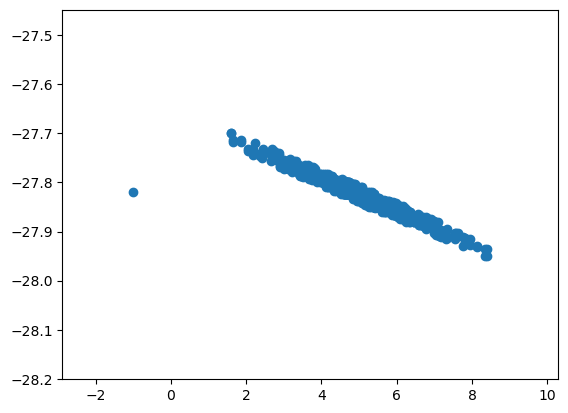

In [8]:
Fz_L21 = []
for i in FzMatrix:
    Fz_L21.append(i[4])
print (Fz_L21)
print (len(Fz_L21))
fig, ax = plt.subplots()
ax.scatter(ZCoordinate,Fz_L21)
ax.margins(0.2, 1)

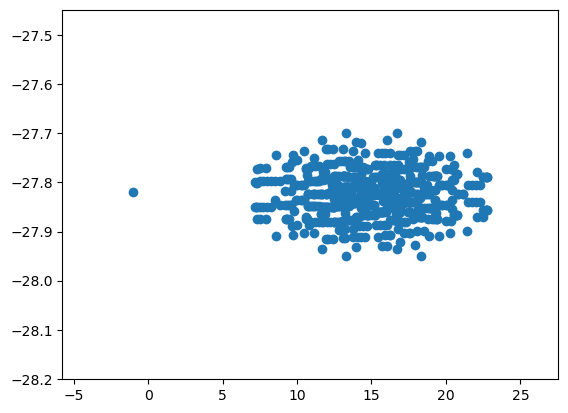

In [9]:
fig, ax = plt.subplots()
ax.scatter(YCoordinate,Fz_L21)
ax.margins(0.2, 1)

### Plot of (y, Fz_L21)

[23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.479, 23.48, 23.48, 23.48, 23.48, 23.48, 23.479, 23.479, 23.479, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48, 23.48

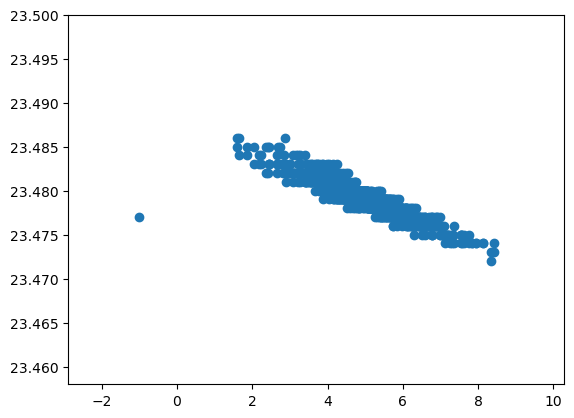

In [10]:
Fz_L21 = []
for i in FzMatrix:
    Fz_L21.append(i[1])
print (Fz_L21)
print (len(Fz_L21))
fig, ax = plt.subplots()
ax.scatter(ZCoordinate,Fz_L21)
ax.margins(0.2, 1)

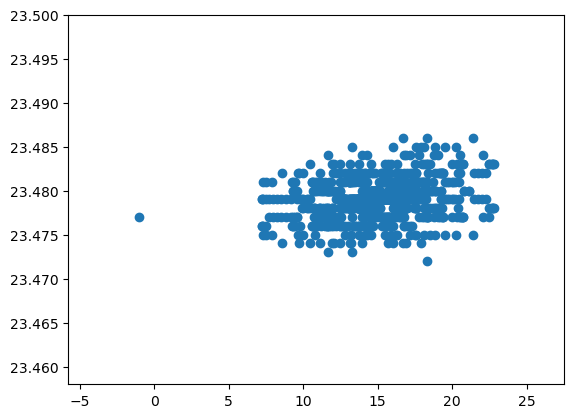

In [11]:
fig, ax = plt.subplots()
ax.scatter(YCoordinate,Fz_L21)
ax.margins(0.2, 1)

### plot of (y,Fx_L21)

[-0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.22738, -0.21432, -0.21432, -0.21432, -0.21432, -0.21432, -0.21432, -0.21432, -0.21432, -0.21432, -0.21432, -0.21432, -0.21432, -0.21432, -0.22738, -0.22738, -0.22738, -0.22738, -0.24045, -0.24045, -0.24045, -0.24045, -0.24045, -0.24045, -0.24045,

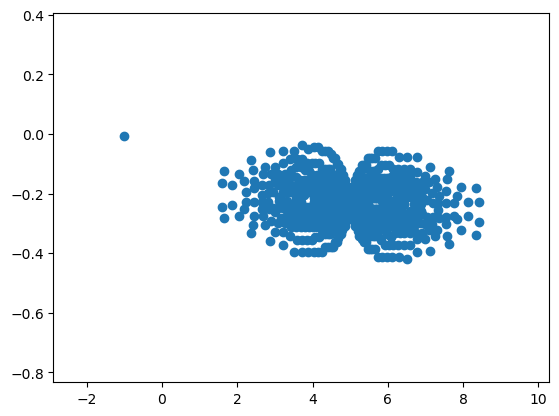

In [12]:
Fx_L21 = []
for i in FxMatrix:
    Fx_L21.append(i[1])
print (Fx_L21)
print (len(Fx_L21))
fig, ax = plt.subplots()
ax.scatter(ZCoordinate,Fx_L21)
ax.margins(0.2, 1)

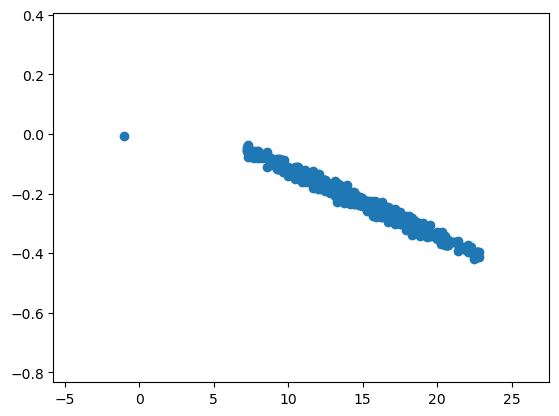

In [13]:
fig, ax = plt.subplots()
ax.scatter(YCoordinate,Fx_L21)
ax.margins(0.2, 1)

### plot of (y,Fx_L12)

[-0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19989, -0.19713, -0.19713, -0.19713, -0.19713, -0.19713, -0.19713, -0.19713, -0.19713, -0.19713, -0.19713, -0.19713, -0.19713, -0.19713, -0.19989, -0.19989, -0.19989, -0.19989, -0.20266, -0.20266, -0.20266, -0.20266, -0.20266, -0.20266, -0.20266,

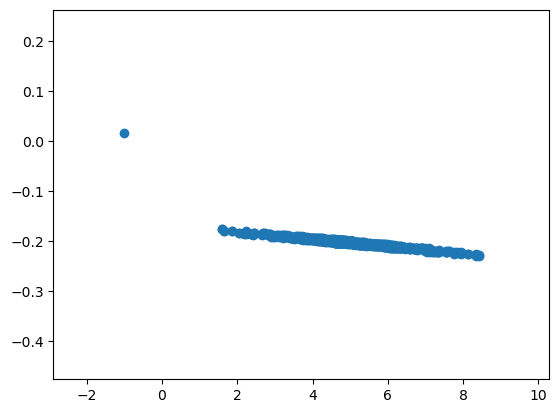

In [14]:
Fx_L12 = []
for i in FxMatrix:
    Fx_L12.append(i[0])
print (Fx_L12)
print (len(Fx_L21))
fig, ax = plt.subplots()
ax.scatter(ZCoordinate,Fx_L12)
ax.margins(0.2, 1)

## displacement $(\Delta x,\Delta y)$

In [19]:
Delta = []
# gap width
d = 2
# corresponding displacement for data set 1
for dx in np.arange(-z_MAX, z_MAX, 1):
    for dy in np.arange(-y_MAX, y_MAX, 1):
        if dx < 0 and dy < 0:
            Delta.append([dx - d, dy - d])
        if dx > 0 and dy < 0:
            Delta.append([dx + d, dy - d])
        if dx < 0 and dy > 0:
            Delta.append([dx - d, dy + d])
        if dx > 0 and dy > 0:
            Delta.append([dx + d, dy + d])
                #print ([dx, dy])
#print(len(Delta))
# corresponding displacement for data set 2
Delta2 = []
for dx in np.arange(-z_MAX, z_MAX, 1):
    for dy in np.arange(-y_MAX, y_MAX, 1):
        if dx == 0 and dy < 0:
            Delta2.append([dx, dy - d])
        if dx == 0 and dy > 0:
            Delta2.append([dx, dy + d])
        if dx < 0 and dy == 0:
            Delta2.append([dx - d, dy])
        if dx > 0 and dy == 0:
            Delta2.append([dx + d, dy])
        if dx == 0 and dy == 0:
            Delta2.append([0, 0])
#for i in Delta2:
 #    print (i)
# null measurement displacement:
Delta3 = []
for dx in np.arange(-d, d + 1, 1):
    for dy in np.arange(-d, d + 1, 1):
        if dx !=0 or dy != 0:
            Delta3.append([dx, dy])
for i in Delta3:
    print (i)
print(len(Delta3))




[-2, -2]
[-2, -1]
[-2, 0]
[-2, 1]
[-2, 2]
[-1, -2]
[-1, -1]
[-1, 0]
[-1, 1]
[-1, 2]
[0, -2]
[0, -1]
[0, 1]
[0, 2]
[1, -2]
[1, -1]
[1, 0]
[1, 1]
[1, 2]
[2, -2]
[2, -1]
[2, 0]
[2, 1]
[2, 2]
24
